# Softmax Regression (Using the PyTorch Module API)

Implementation of *classic* softmax regression (multinomial logistic regression).

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

## Import from helper.py
from helper import load_iris
from helper import plot_iris
from helper import plot_decision_regions

## Preparing a dataset

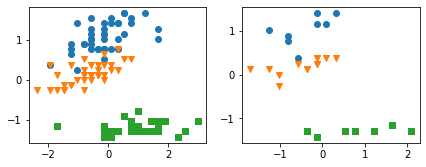

In [2]:
X_train, y_train, X_test, y_test = load_iris()
plot_iris(X_train, y_train, X_test, y_test)

## High-level implementation using the nn.Module API

In [3]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
class SoftmaxRegression2(torch.nn.Module):

    def __init__(self, num_features, num_classes):
        super(SoftmaxRegression2, self).__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)
        # initialize weights to zeros here,
        # since we used zero weights in the
        # manual approach
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        # Note: the trailing underscore
        # means "in-place operation" in the context
        # of PyTorch
        
    def forward(self, x):
        logits = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

model2 = SoftmaxRegression2(num_features=2, num_classes=3).to(DEVICE)
optimizer = torch.optim.SGD(model2.parameters(), lr=0.1)

In [5]:
def comp_accuracy(true_labels, pred_labels):
    accuracy = torch.sum(true_labels.view(-1).float() == 
                         pred_labels.float()).item() / true_labels.size(0)
    return accuracy



X_train = X_train.to(DEVICE)
y_train = y_train.to(DEVICE)
X_test = X_test.to(DEVICE)
y_test = y_test.to(DEVICE)

num_epochs = 50
epoch_cost = []
for epoch in range(num_epochs):
    
    #### Compute outputs ####
    logits, probas = model2(X_train)
    
    #### Compute gradients ####
    cost = F.cross_entropy(logits, y_train.long())
    optimizer.zero_grad()
    cost.backward()
    epoch_cost.append(cost.item())
    
    #### Update weights ####  
    optimizer.step()
    
    #### Logging ####      
    logits, probas = model2(X_train)
    acc = comp_accuracy(y_train, torch.argmax(probas, dim=1))
    print('Epoch: %03d' % (epoch + 1), end="")
    print(' | Train ACC: %.3f' % acc, end="")
    print(' | Cost: %.3f' % F.cross_entropy(logits, y_train.long()))


    
print('\nModel parameters:')
print('  Weights: %s' % model2.linear.weight)
print('  Bias: %s' % model2.linear.bias)

Epoch: 001 | Train ACC: 0.833 | Cost: 1.055
Epoch: 002 | Train ACC: 0.833 | Cost: 1.015
Epoch: 003 | Train ACC: 0.833 | Cost: 0.979
Epoch: 004 | Train ACC: 0.833 | Cost: 0.945
Epoch: 005 | Train ACC: 0.833 | Cost: 0.914
Epoch: 006 | Train ACC: 0.833 | Cost: 0.885
Epoch: 007 | Train ACC: 0.833 | Cost: 0.859
Epoch: 008 | Train ACC: 0.833 | Cost: 0.835
Epoch: 009 | Train ACC: 0.833 | Cost: 0.812
Epoch: 010 | Train ACC: 0.833 | Cost: 0.791
Epoch: 011 | Train ACC: 0.833 | Cost: 0.772
Epoch: 012 | Train ACC: 0.833 | Cost: 0.754
Epoch: 013 | Train ACC: 0.833 | Cost: 0.737
Epoch: 014 | Train ACC: 0.833 | Cost: 0.722
Epoch: 015 | Train ACC: 0.833 | Cost: 0.707
Epoch: 016 | Train ACC: 0.833 | Cost: 0.693
Epoch: 017 | Train ACC: 0.833 | Cost: 0.680
Epoch: 018 | Train ACC: 0.833 | Cost: 0.668
Epoch: 019 | Train ACC: 0.833 | Cost: 0.657
Epoch: 020 | Train ACC: 0.833 | Cost: 0.646
Epoch: 021 | Train ACC: 0.842 | Cost: 0.636
Epoch: 022 | Train ACC: 0.867 | Cost: 0.627
Epoch: 023 | Train ACC: 0.867 | 

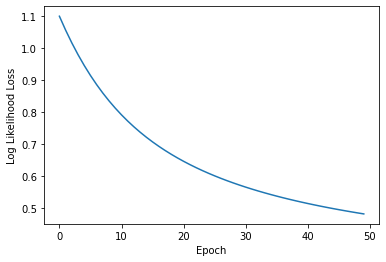

In [6]:
plt.plot(epoch_cost)
plt.ylabel('Log Likelihood Loss')
plt.xlabel('Epoch')
plt.show()

In [7]:
def predict_labels(x, model):
    logits, probas = model(x)
    labels = torch.argmax(probas, dim=1)
    return labels    

def evaluate(x, y, model):
    labels = predict_labels(x, model).float()
    accuracy = torch.sum(labels.view(-1) == y.float()).item() / y.size(0)
    return accuracy

In [8]:
X_test = X_test.to(DEVICE)
y_test = y_test.to(DEVICE)


test_acc = evaluate(X_test, y_test, model2)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 80.00%


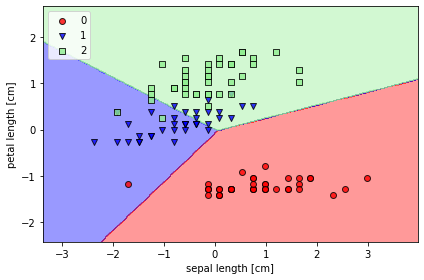

In [9]:
plot_decision_regions(X_train, y_train, classifier=model2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

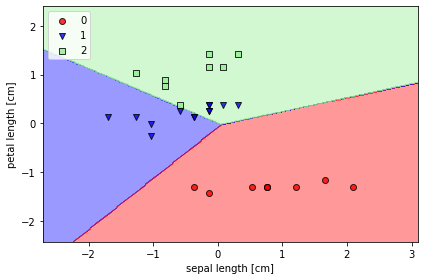

In [10]:
plot_decision_regions(X_test, y_test, classifier=model2)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()